In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']  # 优先微软雅黑/黑体
plt.rcParams['axes.unicode_minus'] = False  # 修复负号显示
data=pd.read_csv(r"D:\MachineLearningTrain\zf\processed_data.csv",sep=',',index_col=0,encoding='utf-8-sig')
data

,RELIEF_MED,ELEV_MED,SQKM,OBJECTID,正样本,POINT_X,POINT_Y,ndvi,宜黄dem,曲率,...,elevation_diff,soil_ACh,soil_ACu,soil_ALh,soil_ATc,landform_LP,landform_SH,landform_SM,landform_TM,shape_index
SLOPE_MED,,,,,,,,,,,,,,,,,,,,,
27.1,240.0,529.0,3339.064421,1,0,116.161667,27.052222,0.790292,553,-9.072000e+09,...,24.0,1,0,0,0,0,1,0,0,57.864406
27.1,240.0,529.0,3339.064421,2,0,116.162500,27.060556,0.791342,501,6.480000e+09,...,-28.0,1,0,0,0,0,1,0,0,57.864406
27.1,240.0,529.0,3339.064421,3,0,116.227222,27.084722,0.770125,431,-1.814400e+10,...,-98.0,1,0,0,0,0,1,0,0,57.864406
27.1,240.0,529.0,3339.064421,4,0,116.173056,27.085000,0.731075,333,-3.888000e+09,...,-196.0,1,0,0,0,0,1,0,0,57.864406
23.5,241.0,604.0,10.425662,5,0,116.167222,27.098056,0.752542,439,1.166400e+10,...,-165.0,0,1,0,0,0,1,0,0,2.322222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.4,32.0,87.0,25.253434,421,1,116.347500,27.660556,0.630142,97,-1.036800e+10,...,10.0,0,0,0,1,1,0,0,0,3.338170
7.7,68.0,120.0,65.988743,422,1,116.350000,27.668333,0.723758,115,9.072000e+09,...,-5.0,1,0,0,0,1,0,0,0,5.487212
12.5,155.0,172.0,207.668235,423,1,116.288056,27.631389,0.762558,133,-1.684800e+10,...,-39.0,1,0,0,0,0,1,0,0,5.460597


In [58]:
data.columns.tolist()

['RELIEF_MED',
 'ELEV_MED',
 'SQKM',
 'OBJECTID',
 '正样本',
 'POINT_X',
 'POINT_Y',
 'ndvi',
 '宜黄dem',
 '曲率',
 '坡向',
 '坡度',
 'yihuangjia',
 'NEAR_FID',
 'geometry',
 'distance_to_water',
 'distance_to_road',
 'rock_IA1',
 'rock_IP4',
 'rock_SC2',
 'rock_SC4',
 'rock_SO1',
 'slope_diff',
 'elevation_diff',
 'soil_ACh',
 'soil_ACu',
 'soil_ALh',
 'soil_ATc',
 'landform_LP',
 'landform_SH',
 'landform_SM',
 'landform_TM',
 'shape_index']

In [59]:
data.drop(columns=['OBJECTID','NEAR_FID','geometry','POINT_X','POINT_Y'], inplace=True,errors='ignore')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 27.1 to 12.5
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RELIEF_MED         424 non-null    float64
 1   ELEV_MED           424 non-null    float64
 2   SQKM               424 non-null    float64
 3   正样本                424 non-null    int64  
 4   ndvi               424 non-null    float64
 5   宜黄dem              424 non-null    int64  
 6   曲率                 424 non-null    float64
 7   坡向                 424 non-null    float64
 8   坡度                 424 non-null    float64
 9   yihuangjia         424 non-null    float64
 10  distance_to_water  424 non-null    float64
 11  distance_to_road   424 non-null    float64
 12  rock_IA1           424 non-null    int64  
 13  rock_IP4           424 non-null    int64  
 14  rock_SC2           424 non-null    int64  
 15  rock_SC4           424 non-null    int64  
 16  rock_SO1           424 non-

解决缺失值被0填补问题（排除独热编码）

In [61]:
import pandas as pd

# 假设df是处理后的数据集，包含所有特征
# 需要排除的独热编码特征列表（示例）
one_hot_features = ['rock_IA1', 'rock_IP4', 'rock_SC2', 'rock_SC4', 'rock_SO1',
                    'soil_ACh', 'soil_ACu', 'soil_ALh', 'soil_ATc',
                    'landform_LP', 'landform_SH', 'landform_SM', 'landform_TM','正样本']

# 筛选非独热编码的数值列
non_one_hot_features = [col for col in data.columns 
                       if col not in one_hot_features 
                       and pd.api.types.is_numeric_dtype(data[col])]
# 统计非独热特征中0的分布
print("非独热特征中0的分布：")
for col in non_one_hot_features:
    total = len(data)
    zero_count = (data[col] == 0).sum()
    zero_percent = (zero_count / total) * 100
    print(f"特征 '{col}' 中0的占比：{zero_percent:.2f}%")

非独热特征中0的分布：
特征 'RELIEF_MED' 中0的占比：0.00%
特征 'ELEV_MED' 中0的占比：0.00%
特征 'SQKM' 中0的占比：0.00%
特征 'ndvi' 中0的占比：0.94%
特征 '宜黄dem' 中0的占比：0.00%
特征 '曲率' 中0的占比：3.54%
特征 '坡向' 中0的占比：1.65%
特征 '坡度' 中0的占比：0.24%
特征 'yihuangjia' 中0的占比：0.71%
特征 'distance_to_water' 中0的占比：0.00%
特征 'distance_to_road' 中0的占比：0.00%
特征 'slope_diff' 中0的占比：0.00%
特征 'elevation_diff' 中0的占比：0.47%
特征 'shape_index' 中0的占比：0.00%


In [62]:
# 计算每个非独热特征的均值（每个特征独立计算）
means = data[non_one_hot_features].mean()

# 用均值填充每个特征的缺失值
data[non_one_hot_features] = data[non_one_hot_features].fillna(means)

print("各特征的均值：")
print(means)
# 计算均值并填充
means = data[non_one_hot_features].mean()
data[non_one_hot_features] = data[non_one_hot_features].fillna(means)

各特征的均值：
RELIEF_MED           2.005778e+02
ELEV_MED             4.190519e+02
SQKM                 1.485371e+03
ndvi                 7.256528e-01
宜黄dem                3.300542e+02
曲率                  -1.027019e+09
坡向                   1.739509e+02
坡度                   1.560210e+01
yihuangjia           1.730384e+03
distance_to_water    7.669473e-02
distance_to_road     2.077125e-02
slope_diff          -5.314645e+00
elevation_diff      -8.899764e+01
shape_index          2.856382e+01
dtype: float64


标准化

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#实例化
data[non_one_hot_features] = scaler.fit_transform(data[non_one_hot_features])

创建新特征

In [64]:
import numpy as np

# 1. 地形与水文的交互效应 --------------------------------------------------------
# 坡度×降水：捕捉陡坡区域在高降水下的滑坡敏感性
data['slope_rain_interaction'] = data['坡度'] * data['yihuangjia']

# 曲率×高程：地形曲率与高程联合作用（如山顶/山谷稳定性差异）
data['curvature_elevation'] = data['曲率'] * data['宜黄dem']

# 2. 非线性变换 --------------------------------------------------------------
# 坡度的平方：捕捉极端坡度的影响（如 >45° 的区域）
data['slope_squared'] = data['坡度'] ** 2

# 曲率的绝对值：负曲率（山谷）和正曲率（山脊）可能对滑坡贡献不同
data['curvature_abs'] = np.abs(data['曲率'])

In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 假设数据已加载到 df 中，目标变量为 'target'

Y = data['正样本'].values         # 目标变量（一维数组）
X = data.drop(columns=['正样本'])  # 特征矩阵
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42,stratify=Y  # 添加分层抽样
)

先数据划分->训练集上进行特征选择->将相同特征选择应用到测试集（确保测试集/训练集 特征一致）

In [66]:
#Y=data.iloc[:,data.columns =="正样本"]
#X=data.loc[:, data.columns != "正样本"].copy()  # 创建独立副本

正在检测高相关特征对：
* 高相关对：ELEV_MED vs RELIEF_MED (0.93)
* 高相关对：rock_IA1 vs SQKM (0.90)
* 高相关对：landform_SM vs rock_SO1 (1.00)
* 高相关对：landform_TM vs soil_ALh (1.00)
* 高相关对：shape_index vs SQKM (0.98)

特征删除报告：
原始特征数量：31
检测到高相关特征：9个
实际删除特征：4个
被删除的特征： ['ELEV_MED', 'RELIEF_MED', 'SQKM', 'shape_index']


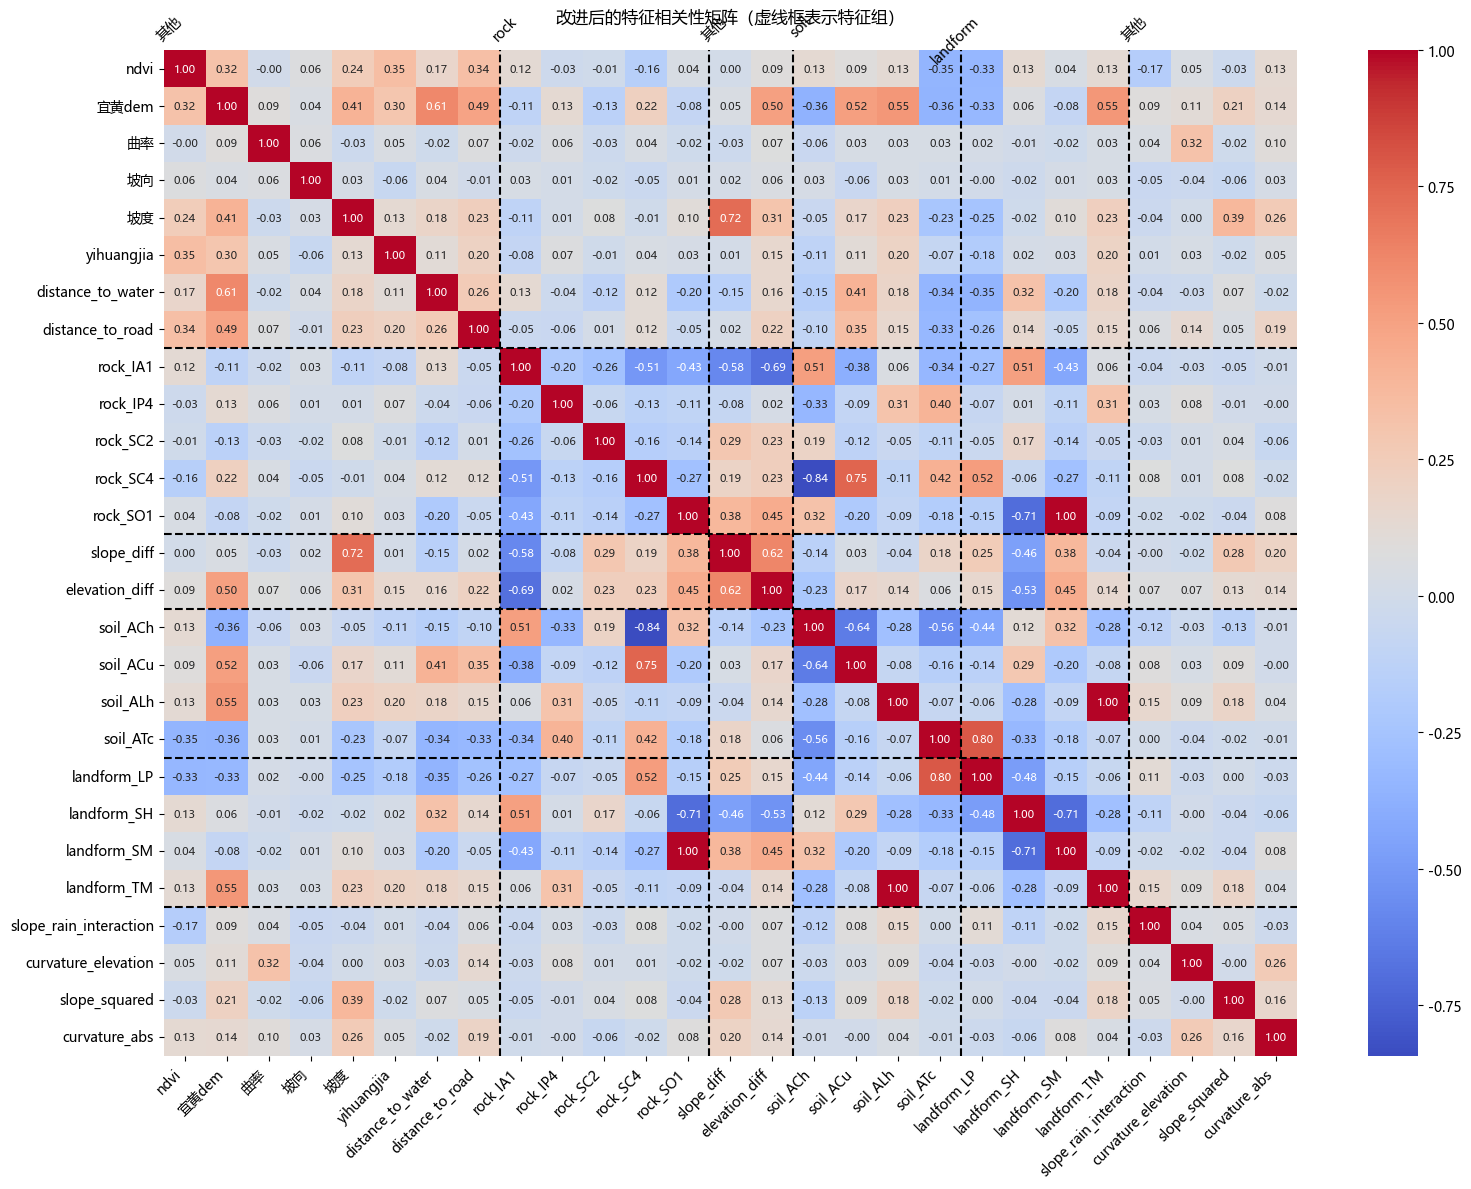

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 定义独热编码特征列表（根据实际数据调整）
one_hot_features = ['rock_IA1', 'rock_IP4', 'rock_SC2', 'rock_SC4', 'rock_SO1',
                    'soil_ACh', 'soil_ACu', 'soil_ALh', 'soil_ATc',
                    'landform_LP', 'landform_SH', 'landform_SM', 'landform_TM']


# 特征预处理 ----------------------------------------------------------
# 2. 创建特征分组映射（增强健壮性） 创建独热编码特征组映射字典
feature_to_group = {}
for feature in one_hot_features:
    if feature in X_train.columns:
        # 支持多种命名方式（如soil-type_ACu）
        group = feature.split('_')[0].split('-')[0]  
        feature_to_group[feature] = group

# 3. 在训练集上计算相关系数矩阵
corr_matrix = X_train.corr()
# 设置相关性阈值
base_threshold = 0.8  # 普通特征阈值
oh_threshold = 0.9    # 涉及独热编码特征的阈值

# 4. 高相关性检测（带动态阈值和日志）   改进的高相关性检测逻辑（跳过同组独热编码特征）
high_corr_pairs = []
high_corr_features = set()

print("正在检测高相关特征对：")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        col_i = corr_matrix.columns[i]
        col_j = corr_matrix.columns[j]
        
        # 跳过同组独热编码特征
        group_i = feature_to_group.get(col_i, None)
        group_j = feature_to_group.get(col_j, None)
        if group_i and group_j and group_i == group_j:
            continue
        
        # 动态阈值设置
        is_oh_pair = (col_i in one_hot_features) or (col_j in one_hot_features)
        current_threshold = oh_threshold if is_oh_pair else base_threshold
        
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > current_threshold:
            high_corr_features.update([col_i, col_j])
            high_corr_pairs.append( (col_i, col_j, corr_value) )
            print(f"* 高相关对：{col_i} vs {col_j} ({corr_value:.2f})")

# 5. 智能特征删除策略 ------------------------------------------------
# 分类特征类型
oh_candidates = [col for col in high_corr_features if col in one_hot_features]
regular_candidates = [col for col in high_corr_features if col not in one_hot_features]

# 计算需要删除的数量
n_remove = len(high_corr_features) // 2

# 优先删除普通特征
if len(regular_candidates) >= n_remove:
    # 按相关性总得分排序
    regular_scores = {k: corr_matrix[k].abs().sum() for k in regular_candidates}
    to_remove = sorted(regular_scores, key=lambda x: regular_scores[x], reverse=True)[:n_remove]
else:
    # 补充删除独热编码特征
    n_need = n_remove - len(regular_candidates)
    oh_scores = {k: corr_matrix[k].abs().sum() for k in oh_candidates}
    to_remove = regular_candidates + sorted(oh_scores, key=lambda x: oh_scores[x], reverse=True)[:n_need]

# 执行删除
X_train_filtered = X_train.drop(columns=to_remove)
X_test_filtered = X_test.drop(columns=to_remove)

# 6. 验证过滤结果 ------------------------------------------------------------
print(f"\n特征删除报告：")
print(f"原始特征数量：{len(X_train.columns)}")
print(f"检测到高相关特征：{len(high_corr_features)}个")
print(f"实际删除特征：{len(to_remove)}个")
print("被删除的特征：", to_remove)

# 7. 可视化改进 （添加特征分组标识）----------------------------------------------------------
plt.figure(figsize=(16, 12))
ax = sns.heatmap(X_train_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":8})

# 添加分组边界线（增强可视化）
current_group = None
for idx, col in enumerate(X_train_filtered.columns):
    group = feature_to_group.get(col, '其他')
    if group != current_group:
        if current_group is not None:
            ax.axhline(idx, color='black', lw=1.5, linestyle='--')
            ax.axvline(idx, color='black', lw=1.5, linestyle='--')
        current_group = group
        ax.text(idx+0.5, -1, group, rotation=45, ha='right', va='top', fontsize=10)
        
plt.title("改进后的特征相关性矩阵（虚线框表示特征组）", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


可选:VIF检验

特征重要性

随机森林，逻辑回归，支持向量机SVM

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# 全局配置
RANDOM_STATE = 42
CV_FOLDS = 5
SCORING = 'roc_auc'
PLOT_SIZE = (10, 8)

# 确保使用处理后的数据
# X_train_filtered, X_test_filtered, y_train, y_test 应已定义

#网格搜索寻找最佳参数（防止过拟合）

In [77]:
model_configs = [
    {
        'name': 'SVM',
        'model': SVC(probability=True, class_weight='balanced',random_state=RANDOM_STATE),
        'params': {
            'C': [0.1, 1, 10, 100],          # 控制正则化强度
            'gamma': [0.001, 0.01, 0.1, 'scale'],  # 核函数带宽
            'kernel': ['rbf', 'linear']    # 核函数类型
    
        }
    },
    {
        'name': 'RandomForest',
        'model': RandomForestClassifier(random_state=RANDOM_STATE,class_weight='balanced_subsample'),
        'params': {
            'n_estimators': [200, 300, 400],    # 树的数量
            'max_depth': [5, 7, 9],      # 树的最大深度
            'min_samples_split': [2, 5],     # 节点分裂最小样本数
            'min_samples_leaf': [3, 5],
            'max_features': ['sqrt', 0.5]
        }
    },
    {
        'name': 'LogisticRegression',
        'model': LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'),
        'params': {
            'C': np.logspace(-3, 3, 7),      # 正则化强度的倒数
            'penalty': ['l1', 'l2'],         # 正则化类型
            'class_weight': ['balanced', None]  # 适用于L1/L2的求解器
        }
    }
]




自动化调优评估


===== 正在优化 SVM =====
Fitting 5 folds for each of 32 candidates, totalling 160 fits
最佳参数：{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
测试集AUC：0.6419

===== 正在优化 RandomForest =====
Fitting 5 folds for each of 72 candidates, totalling 360 fits
最佳参数：{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
测试集AUC：0.6998

===== 正在优化 LogisticRegression =====
Fitting 5 folds for each of 28 candidates, totalling 140 fits
最佳参数：{'C': np.float64(10.0), 'class_weight': None, 'penalty': 'l1'}
测试集AUC：0.6346


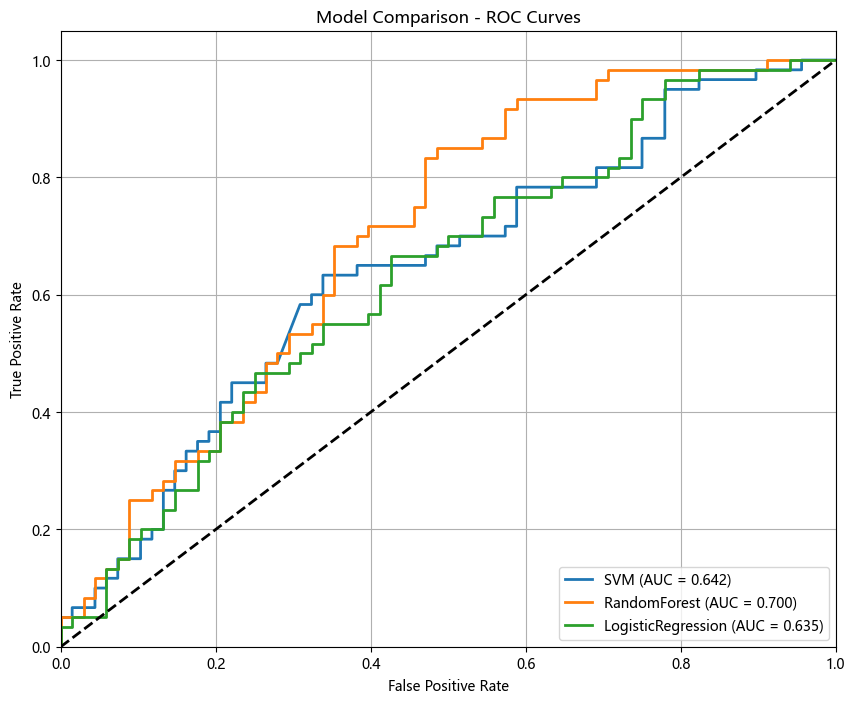

In [78]:
def model_comparison_pipeline(models_config):
    results = {}
    plt.figure(figsize=PLOT_SIZE)
    
    for config in models_config:
        print(f"\n===== 正在优化 {config['name']} =====")
        
        # 网格搜索与交叉验证
        grid = GridSearchCV(
            estimator=config['model'],
            param_grid=config['params'],
            cv=StratifiedKFold(CV_FOLDS),
            scoring=SCORING,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train_filtered, y_train)
        
        # 获取最佳模型
        best_model = grid.best_estimator_
        
        # 预测概率
        if hasattr(best_model, 'predict_proba'):
            test_proba = best_model.predict_proba(X_test_filtered)[:, 1]
        else:  # 兼容SVC的probability=False情况
            test_proba = best_model.decision_function(X_test_filtered)
        
        # 计算指标
        test_roc_auc = roc_auc_score(y_test, test_proba)
        fpr, tpr, _ = roc_curve(y_test, test_proba)
        
        # 存储结果
        results[config['name']] = {
            'model': best_model,
            'params': grid.best_params_,
            'auc': test_roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }
        
        # 绘制ROC曲线
        plt.plot(fpr, tpr, lw=2,
                 label=f"{config['name']} (AUC = {test_roc_auc:.3f})")
        
        # 打印最佳参数
        print(f"最佳参数：{grid.best_params_}")
        print(f"测试集AUC：{test_roc_auc:.4f}")
    
    # 可视化设置
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model Comparison - ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    return results

# 执行比较
comparison_results = model_comparison_pipeline(model_configs)

In [79]:
def select_best_model(results):
    # 按AUC排序
    sorted_models = sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True)
    
    print("\n模型性能排名：")
    for rank, (name, data) in enumerate(sorted_models, 1):
        print(f"{rank}. {name}: AUC = {data['auc']:.4f}")
    
    # 返回最佳模型
    best_name, best_data = sorted_models[0]
    print(f"\n最佳模型：{best_name} (AUC = {best_data['auc']:.4f})")
    return best_data['model']

best_model = select_best_model(comparison_results)


模型性能排名：
1. RandomForest: AUC = 0.6998
2. SVM: AUC = 0.6419
3. LogisticRegression: AUC = 0.6346

最佳模型：RandomForest (AUC = 0.6998)


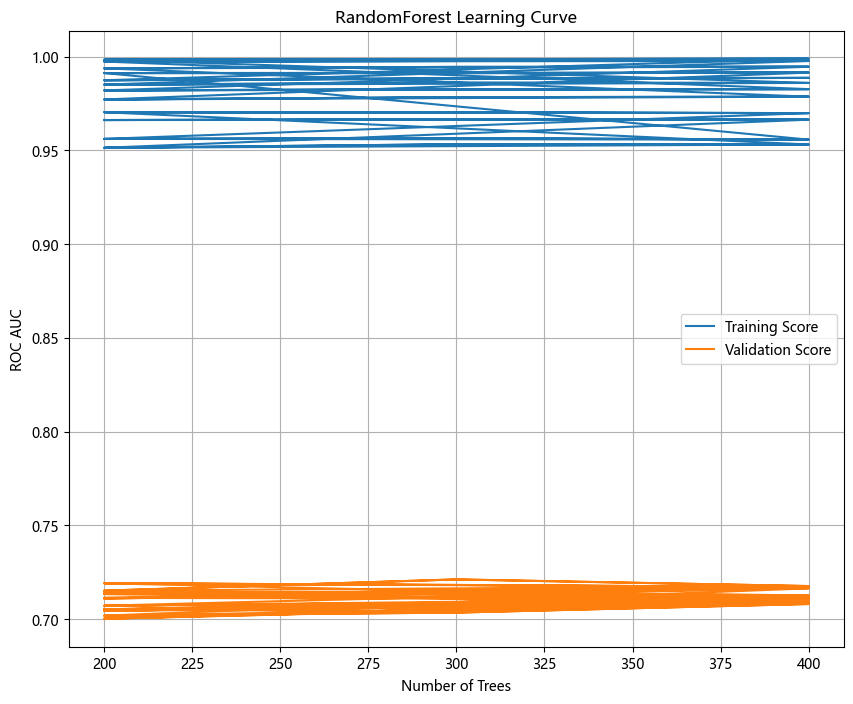

In [80]:
# 训练曲线可视化（以随机森林为例）
rf_grid = GridSearchCV(
    model_configs[1]['model'],
    model_configs[1]['params'],
    cv=StratifiedKFold(CV_FOLDS),
    scoring=SCORING,
    n_jobs=-1,
    return_train_score=True
)
rf_grid.fit(X_train_filtered, y_train)

# 提取不同n_estimators的表现（示例参数）
results = pd.DataFrame(rf_grid.cv_results_)
n_estimators_results = results[results['param_n_estimators'].notna()]

plt.figure(figsize=PLOT_SIZE)
plt.plot(n_estimators_results['param_n_estimators'], 
         n_estimators_results['mean_train_score'], 
         label='Training Score')
plt.plot(n_estimators_results['param_n_estimators'],
         n_estimators_results['mean_test_score'],
         label='Validation Score')
plt.xlabel('Number of Trees')
plt.ylabel('ROC AUC')
plt.title('RandomForest Learning Curve')
plt.legend()
plt.grid(True)
plt.show()